# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from scipy.optimize import curve_fit
plt.rcParams['errorbar.capsize']=2

In [28]:
#Bestimmung der Abstände der Minima 
min_order=np.array([2,3,4,5])
min_pos_left=np.array([953, 863, 785, 702]) #von der zweiten bis zur fünften Ordnung
min_pos_right=np.array([1283, 1368, 1450, 1530])
min_pos_left_err = np.array([2, 2, 3, 3])
min_pos_right_err = np.array([4, 1, 2, 1])

delta_min=np.abs(min_pos_left-min_pos_right)
delta_min_err=np.sqrt((min_pos_left_err**2+min_pos_right_err**1))

#Bestimmung der Abstände der Maxima
max_order=np.array([1.5,2.5,3.5,4.5,5.5]) #von der ersten bis zur fünften Ordnung
max_pos_left=np.array([998, 913, 830, 743, 658])
max_pos_right=np.array([1233, 1318, 1405, 1484, 1573])
max_pos_left_err = np.array([5, 10, 3, 3, 4])
max_pos_right_err = np.array([20, 2, 10, 2, 10])

#Abstände der jeweiligen Beugungsordnungen
delta_max=np.abs(max_pos_left-max_pos_right)
delta_max_err=np.sqrt((max_pos_left_err**2+max_pos_right_err**1))

In [29]:
#Eichung der Pixelskala zum Umrechnen des Spaltabstands in Längeneinheiten 
dpx=np.array([690, 533, 365, 217, 740])
dpx_err=9*np.ones(5)
slit_aperture=2*np.array([0.88, 0.69, 0.49, 0.31, 0.94]) #direkt die Messwerte verdoppelt
slit_aperture_err=0.02*np.ones(5)

gauge=slit_aperture/dpx  #Faktor zur Umrechnung von Pixel in mm
gauge_err=gauge*np.sqrt((slit_aperture_err/slit_aperture)**2+(dpx_err/dpx)**2)


Die Spaltbreite entspricht der Steigung der Fit-Gerade:
d = 165.299920524 +/- 2.7348316102 pxl


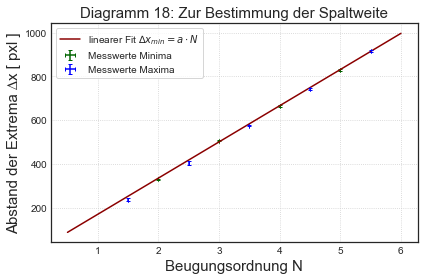

In [30]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b):
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade
x_err=np.zeros(5) #Nur zur Optik der Legende
x_err1 = np.zeros(4)


#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='')
plt.errorbar(min_order,delta_min,xerr=x_err1,yerr=delta_min_err,color='darkgreen',linestyle='',label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Plot der Maxima-Abstände 
plt.plot(max_order,delta_max,linestyle='')
plt.errorbar(max_order,delta_max,xerr=x_err,yerr=delta_max_err,color='b',linestyle='',label='Messwerte Maxima')

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 18: Zur Bestimmung der Spaltweite',size=15)
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Diagramm Teil1.pdf',format='PDF')

slit_width=popt[0]
slit_width_err=pcov[0,0]**0.5

print('Die Spaltbreite entspricht der Steigung der Fit-Gerade:')
print( 'd = ' + str(slit_width) + ' +/- ' + str(slit_width_err) + ' pxl')


In [31]:
#Umrechnung der Spaltbreite in mm
slit_width_mm= gauge*slit_width
slit_width_mm_err=np.sqrt((gauge_err)**2+(slit_width_err*gauge)**2)

sw_mm_mean=np.mean(slit_width_mm)
sw_mm_mean_syst=np.mean(slit_width_mm_err)
sw_mm_mean_std=np.std(slit_width_mm)/np.sqrt(len(slit_width_mm))

print('Mit der Eichung der Skala erhalten wir die Spaltbreite in mm:')
print( 'd = ' + str(sw_mm_mean) + ' +/- ' + str(sw_mm_mean_syst) + ' +/- ' + str(sw_mm_mean_std)+ ' mm')


Mit der Eichung der Skala erhalten wir die Spaltbreite in mm:
d = 0.437134242748 +/- 0.00723272709102 +/- 0.00871682280905 mm


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [32]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert

#für den Fehler der counts gilt hier:
intensity_err=6

max1_intensity_left1=316
ug_left1=87

max1_intensity_right1=298
ug_right1=87


#erste Messung
max0_intensity1=3782
max0_intensity1_err = 7

#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes
max0_1_corr = (max0_intensity1-(ug_left1+ug_right1)/2)
max0_1_corr_err = np.sqrt((max0_intensity1_err/max0_intensity1)**2+(intensity_err/ug_left1/2)**2+(intensity_err/ug_right1/2)**2)


#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err


#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left = max1_left1_corr/max0_1_corr
prob_left_err = prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err = prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()



Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:
0.06197564276048714 +/- 0.00229642270995

Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:
0.0571041948579161 +/- 0.00229642268792



In [33]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet
max_intensity_left2=np.array([1345, 568, 338, 223, 180])
max_intensity_left2_err = np.array([5, 10, 3, 3, 4])
ug_left2=102*np.ones(5)
ug_left2_err = 3*np.ones(5)

max_intensity_left2_corr=max_intensity_left2-ug_left2
max_intensity_left2_corr_err=np.sqrt(ug_left2_err**2+max_intensity_left2_err**2)

max_intensity_right2=np.array([1370, 524, 281, 180, 135])
max_intensity_right2_err = np.array([20, 2, 10, 2, 10])
ug_right2=95*np.ones(5)
ug_right2_err = 5*np.ones(5)

max_intensity_right2_corr=max_intensity_right2-ug_right2
max_intensity_right2_corr_err=np.sqrt(max_intensity_right2_err**2+ug_right2_err**2)

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=max0_intensity2_tot*np.sqrt((max0_intesity2_left_err/max0_intesity2_left)**2+(max0_intesity2_left_err/max0_intesity2_right)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))



Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: 
I_max0 = 21191.9365053 +/- 1064.44160435

Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:
linke Maxima: [ 0.05865438  0.0219895   0.01113631  0.00570972  0.00368065]
Fehler links: [ 0.00295895  0.00120939  0.00059411  0.00034976  0.00029974]

rechte Maxima: [ 0.06016439  0.02024355  0.00877692  0.00401096  0.00188751]
Fehler rechts: [ 0.00317469  0.00104808  0.00068752  0.00032429  0.00053603]


### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


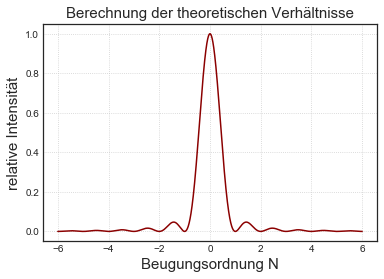

In [34]:
from scipy.signal import argrelextrema

def beugung_spalt(x):
    return np.sinc(x)**2
a=5
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)
plt.grid(ls='dotted')


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [35]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)

Der Vergleich liefert für die linke Seite:
[ 0.01146394  0.00550947  0.00279602  0.000681    0.00031992]
mit Fehler:
[ 0.00295895  0.00120939  0.00059411  0.00034976  0.00029974]

Der Vergleich liefert für die rechte Seite:
[ 0.01297394  0.00376352  0.00043663  0.00101776  0.00147322]
mit Fehler:
[ 0.00317469  0.00104808  0.00068752  0.00032429  0.00053603]


## Teil 2: Beugungsstruktur des Doppelspaltes

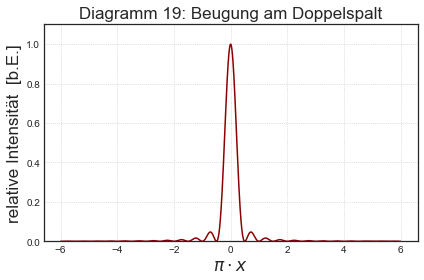

In [84]:
#Beugungsfunktion des Doppelspalts

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite

v = 1

plt.plot(x,beugung_doppelspalt(x),color='darkred')
plt.title('Diagramm 19: Beugung am Doppelspalt',size=17)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)

#Abspeichern des Diagramms
plt.tight_layout()
# plt.savefig('Diagramme/V233Diagramm19.pdf',format='PDF')




## Teil 3: Das Objektbild als Fouriersynthese

In [122]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.signal import argrelextrema 

# Integrand zu Formel 57, Einzelspalt
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Integrand zu 57, Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

In [123]:
# Definiere Funktion zur Berechnung und Zum Ploten der theoretischen
# Werte für den Einzel- und Doppelspalt

# Spaltbreite, 
d = sw_mm_mean
# d = slit_width
# Berechnung und plot des resultierenden Objektbildes
def picture(
           function, # Integrand
           b,        # Integrationsbereich bezüglich der Nullstellen
           dateiname):
    
    # Definieren der Funktionsvariable
    global n
    global g
    g = 2*d
    n = b
    
    if function == spalt:             # zugehörige y-Werte
        y = np.linspace(-d, d, 201) 
    else:
        y = np.linspace(-g, g, 401)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = f_mod/np.max(f_mod)
    
    # Lage und Zahl der Minima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Lage und Zahl der Minima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.1)
    f_min = f_min1[min2]
    y_min = y_min1[min2]
    
    # Plot
    plt.figure(dateiname)
    plt.plot(y, f_mod, color = 'orange', linewidth = 0.6) # des Graphen
    plt.plot(y_max, f_max, linestyle ='', marker = 'x', color = 'blue', label = 'Maxima') # der Maxima
    plt.plot(y_min, f_min, linestyle ='', marker = 'x', color = 'darkred', label = 'Minima') #der Minima
    plt.xlabel('y / d')
    plt.ylabel('Intensität / b. E.')
    plt.title('modifiziertes Objektbild %s' %dateiname)
    plt.legend(frameon = True)
    plt.ylim((0, 1.1))
    plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\%s.pdf' %dateiname)
    
    #Ausgabe der Daten
    
    return f_max, y_max, f_min, y_min


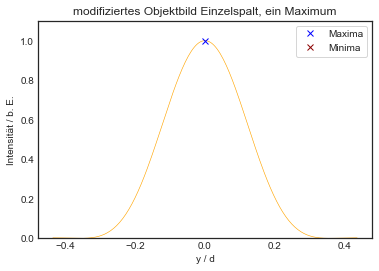

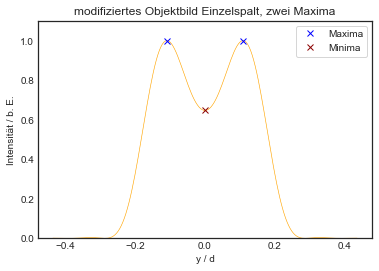

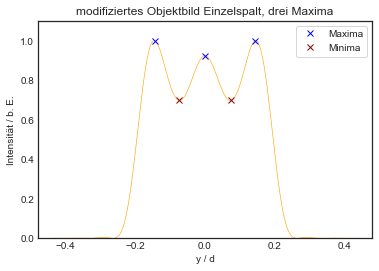

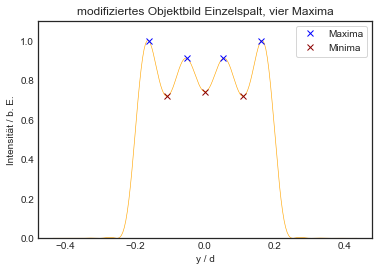

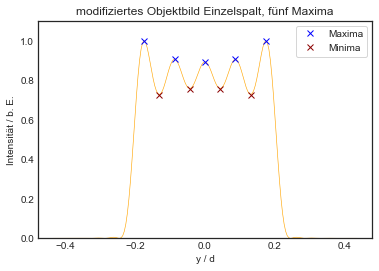

In [124]:
# Berechnung der Einzelspaltwerte
spalt1_max, spalt1_maxPos, spalt1_min, spalt1_minPos = picture(spalt, 1, 'Einzelspalt, ein Maximum')
spalt2_max, spalt2_maxPos, spalt2_min, spalt2_minPos = picture(spalt, 2, 'Einzelspalt, zwei Maxima')
spalt3_max, spalt3_maxPos, spalt3_min, spalt3_minPos = picture(spalt, 3, 'Einzelspalt, drei Maxima')
spalt4_max, spalt4_maxPos, spalt4_min, spalt4_minPos = picture(spalt, 4, 'Einzelspalt, vier Maxima')
spalt5_max, spalt5_maxPos, spalt5_min, spalt5_minPos = picture(spalt, 5, 'Einzelspalt, fünf Maxima')

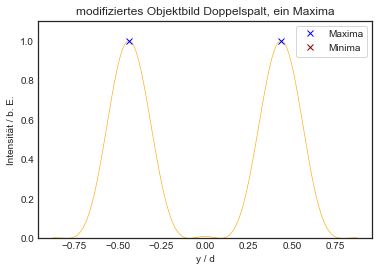

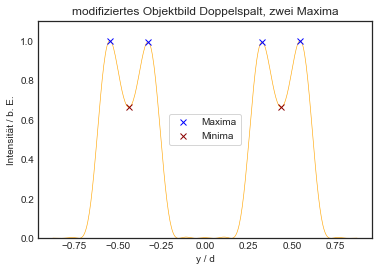

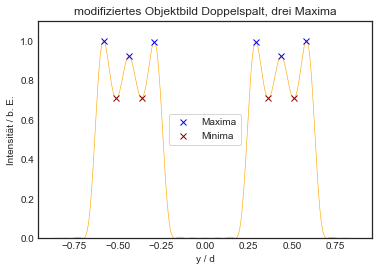

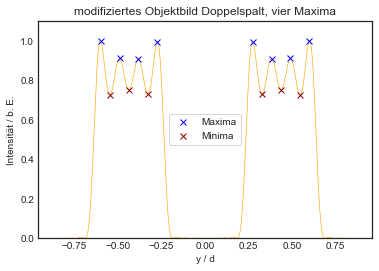

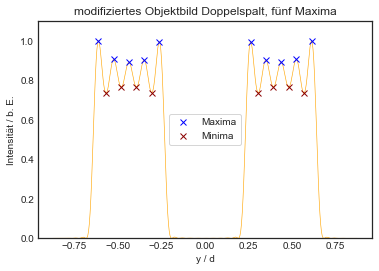

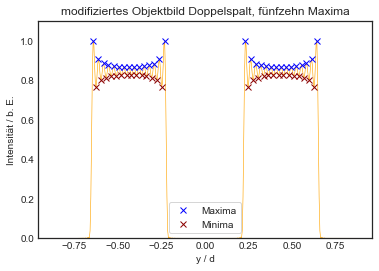

In [125]:
# Berechnung der Doppelspaltbilder
dspalt1_max, dspalt1_maxPos, dspalt1_min, dspalt1_minPos = picture(doppelspalt, 1, 'Doppelspalt, ein Maxima')
dspalt2_max, dspalt2_maxPos, dspalt2_min, dspalt2_minPos = picture(doppelspalt, 2, 'Doppelspalt, zwei Maxima')
dspalt3_max, dspalt3_maxPos, dspalt3_min, dspalt3_minPos = picture(doppelspalt, 3, 'Doppelspalt, drei Maxima')
dspalt4_max, dspalt4_maxPos, dspalt4_min, dspalt4_minPos = picture(doppelspalt, 4, 'Doppelspalt, vier Maxima')
dspalt5_max, dspalt5_maxPos, dspalt5_min, dspalt5_minPos = picture(doppelspalt, 5, 'Doppelspalt, fünf Maxima')
dspalt15_max, dspalt15_maxPos, dspalt15_min, dspalt15_minPos = picture(doppelspalt, 15, 'Doppelspalt, fünfzehn Maxima')

In [143]:
# Berechnung der theoretische Abstände der Maxima und Minima
def distance(pos):
    Pos = []
    if len(pos) < 2:
        True
    else:
        for i in range(len(pos) - 1):
            Pos.append(pos[i+1] - pos[i])
    return np.round(Pos, 3)

In [144]:
# für Einzelspalte, Maxima
print(distance(spalt1_maxPos))
print(distance(spalt2_maxPos))
print(distance(spalt3_maxPos))
print(distance(spalt4_maxPos))
print(distance(spalt5_maxPos))

[]
[ 0.219]
[ 0.144  0.144]
[ 0.109  0.105  0.109]
[ 0.087  0.087  0.087  0.087]


In [148]:
# für Einzelspalte, Minima
print(distance(spalt1_minPos))
print(distance(spalt2_minPos))
print(distance(spalt3_minPos))
print(distance(spalt4_minPos))
print(distance(spalt5_minPos))

[]
[]
[ 0.149]
[ 0.109  0.109]
[ 0.087  0.087  0.087]


In [146]:
# für Doppelspalte, Maxima
print(distance(dspalt1_maxPos))
print(distance(dspalt2_maxPos))
print(distance(dspalt3_maxPos))
print(distance(dspalt4_maxPos))
print(distance(dspalt5_maxPos))
print(distance(dspalt15_maxPos))

[ 0.874]
[ 0.219  0.656  0.219]
[ 0.144  0.144  0.586  0.144  0.144]
[ 0.109  0.105  0.109  0.551  0.109  0.105  0.109]
[ 0.087  0.087  0.087  0.087  0.525  0.087  0.087  0.087  0.087]
[ 0.031  0.031  0.026  0.031  0.031  0.026  0.031  0.031  0.026  0.031
  0.031  0.026  0.031  0.031  0.463  0.031  0.031  0.026  0.031  0.031
  0.026  0.031  0.031  0.026  0.031  0.031  0.026  0.031  0.031]


In [147]:
# für Doppelspalte, Minima
print(distance(dspalt1_minPos))
print(distance(dspalt2_minPos))
print(distance(dspalt3_minPos))
print(distance(dspalt4_minPos))
print(distance(dspalt5_minPos))
print(distance(dspalt15_minPos))

[]
[ 0.874]
[ 0.149  0.726  0.149]
[ 0.109  0.109  0.656  0.109  0.109]
[ 0.087  0.087  0.087  0.612  0.087  0.087  0.087]
[ 0.026  0.031  0.031  0.026  0.031  0.031  0.026  0.031  0.031  0.026
  0.031  0.031  0.026  0.498  0.026  0.031  0.031  0.026  0.031  0.031
  0.026  0.031  0.031  0.026  0.031  0.031  0.026]


In [ ]:
#Experimentelle Werte


## Teil 4: Fourierbild des Doppelspaltes